# Actividad 4.1 Procesos de la vida real como distribuciones de probabilidad

## Descripción del Origen de las Observaciones

Proceso: Horas de sueño reparador (Sueño profundo + REM) entre el 6 de febrero y el 7 de marzo.

Motivación: Identificar tendencias o hábitos que podrían estar afectando negativamente mi salud a largo plazo, y encontrar oportunidades de mejora en mi recuperación diaria.


In [20]:
! pip install pandas
! pip install fitter
! pip install matplotlib

## Histogramas

A continuación se muestran dos histogramas, el primero que me interesaba saber como se veía la cantidad de horas de sueño separadas en tiempo REM y Sueño Profundo (SWS)

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from fitter import Fitter

In [23]:
df = pd.read_csv('SleepFeb06-Mar07.csv')

In [24]:
# Convertir 'Fecha' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

/var/folders/k9/t4qsb3ts6979r1ccv9dg4v600000gn/T/ipykernel_36614/1189913525.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)


In [25]:
# Convertir hh:mm a minutos
def time_to_minutes(t):
    try:
        h, m = map(int, t.strip().split(':'))
        return h * 60 + m
    except:
        return 0

In [26]:
# Convertir SWS y REM a minutes
df['SWS_min'] = df['Sueño Profundo (SWS)'].apply(time_to_minutes)
df['REM_min'] = df['REM'].apply(time_to_minutes)

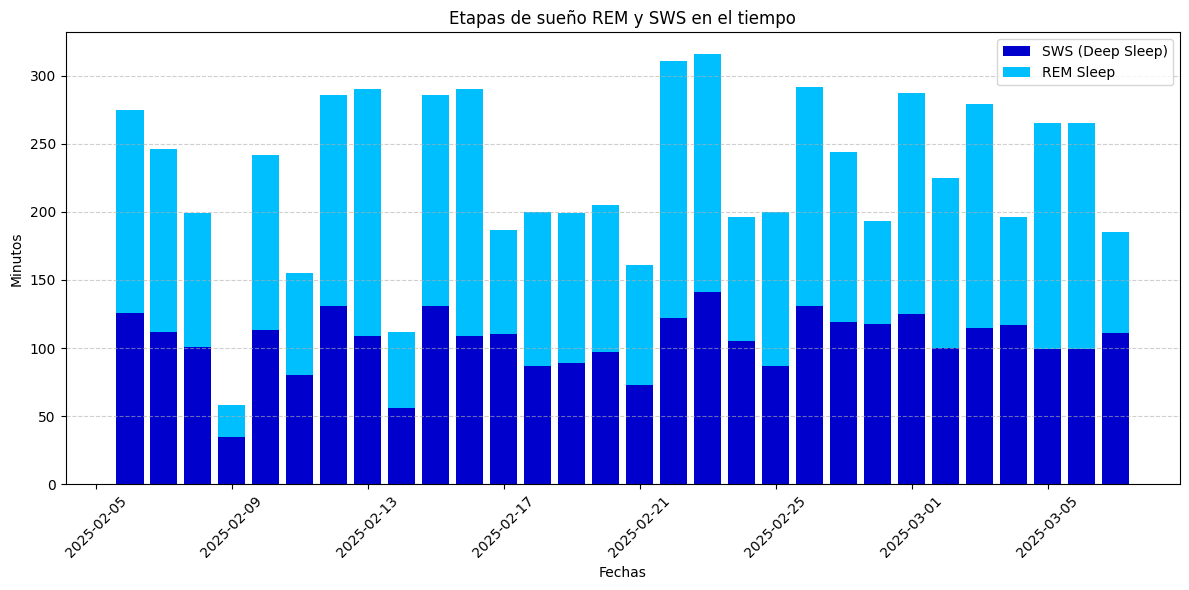

In [27]:
# Imprimir histogtama con SWS y REM identificados
plt.figure(figsize=(12, 6))
plt.bar(df['Fecha'], df['SWS_min'], label='SWS (Deep Sleep)', color='mediumblue')
plt.bar(df['Fecha'], df['REM_min'], bottom=df['SWS_min'], label='REM Sleep', color='deepskyblue')

# Etiquetas y Título
plt.xlabel("Fechas")
plt.ylabel("Minutos")
plt.title("Etapas de sueño REM y SWS en el tiempo")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Este segundo histograma muestra la frecuencia de minutos que dormí a lo largo del mes y a simple vista se puede observar que ajustar una distribución puede llegar a ser complicado debido a la variabilidad de mis datos de sueño

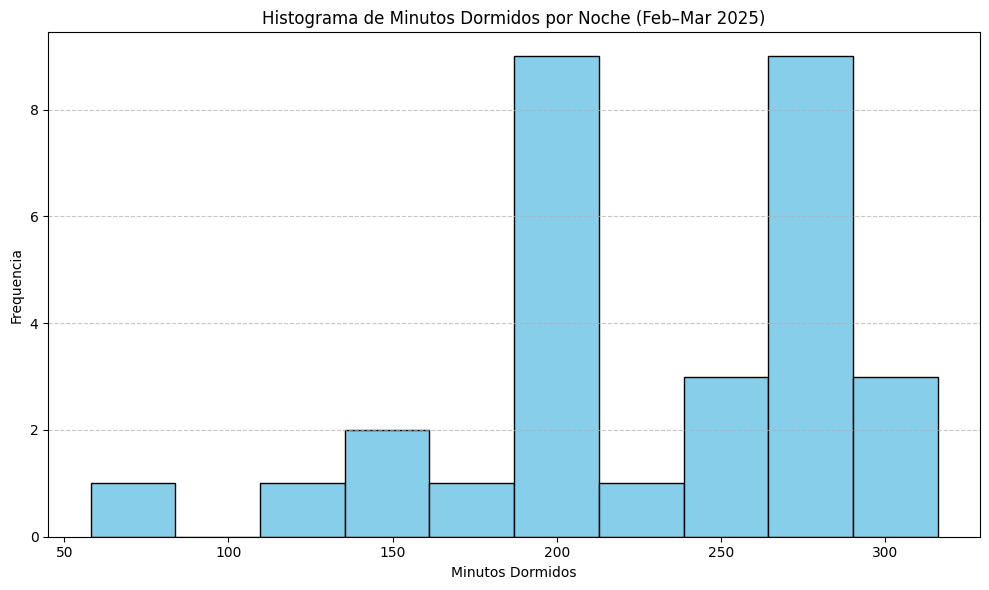

In [28]:
# Frecuencia de sueño en Histograma
sleep_minutes = df['Total Minutos'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sleep_minutes, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Minutos Dormidos por Noche (Feb–Mar 2025)')
plt.xlabel('Minutos Dormidos')
plt.ylabel('Frequencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribución Ajustada

A continuación se muestran los resultados de utilizar diferentes distribuciones para ver cual es la más optima para mi caso:

2025-04-07 21:58:16.951 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.007304)
2025-04-07 21:58:16.951 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.006164)
2025-04-07 21:58:16.954 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.006164)
2025-04-07 21:58:16.970 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.006172)
2025-04-07 21:58:16.978 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=0.006079)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.006079,1169.307015,1174.911805,inf,0.153522,0.435872
norm,0.006164,1208.068137,1210.870531,inf,0.130625,0.638198
lognorm,0.006164,1210.069166,1214.272758,inf,0.130625,0.638194
gamma,0.006172,1211.865755,1216.069348,inf,0.135467,0.593375
expon,0.007304,1182.971732,1185.774127,inf,0.392562,0.000112


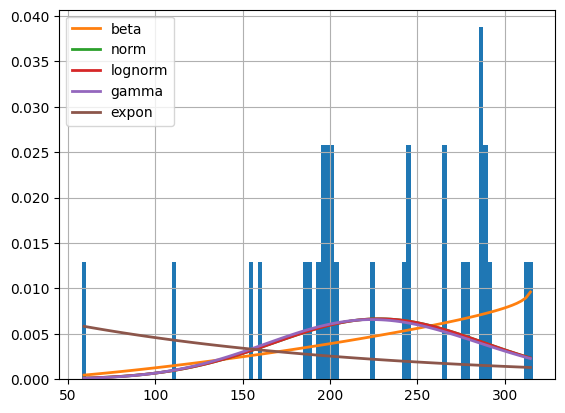

In [29]:
f = Fitter(sleep_minutes, distributions=['norm', 'lognorm', 'gamma', 'beta', 'expon'])
f.fit()
f.summary()

In [30]:
best_distribution = f.get_best()
print("Mejor Distribución:", best_distribution)

Mejor Distribución: {'beta': {'a': 2.3153923251923354, 'b': 0.9469675836202569, 'loc': 23.53789314703334, 'scale': 292.4621068529667}}


## Resultados

Como fue mencionado anteriormente, los datos de sueño con los que cuento son demasiado cambiantes por la variabilidad de sueño que he tenido.

En este caso se puede observar que la mejor distribución sería la beta que es la que cuenta con un menor error y menores valores aic y bic lo cual es bueno

### Parámetros

a y b: 
Son parámetros de forma los cuales controlan la forma de la curvatura

Si a > b implica una distribución sesgada hacia la izquierda (más valores cercanos al máximo) y viceversa

En este caso a = 2.31 y b = 0.95 lo que significa que hay una acumulación de datos hacia el lado derecho del rango (es decir, más noches con sueño largo).

loc:

Se refiere al desplazamiento lo que mueve el inicio del intervalo.
Aquí significa que la distribución comienza en 23.54 minutos (aproximadamente).

scale:

Define el rango de la distribución: termina en loc + scale = 23.54 + 292.46 ≈ 316 minutos.

## Reflexión

El modelo generado puede servir de diferentes maneras, a continuación comentaré algunas de ellas:

1- Generar datos artificiales similares a tu patrón de sueño:
    Simulaciones para predicción o estudios de hábitos.
2- Cálculo de probabilidades:
    ¿Cuál es la probabilidad de dormir más de 5 horas (300 minutos)?
3- Detección de outliers o anomalías:
    Podemos definir un sueño normal entre los percentiles 5 y 95 de la distribución

De igual manera se pueden usar distribuciones de probabilidad para comparar procesos diferentes y ver si se comportan de manera similar o diferente.

Esto lo podemos hacer modelando el sueño de una Persona A (Con una distribución Beta) con el sueño de una Persona B (Con una Distribución Normal)

Y no solo podemos limitarnos a solo el sueño, podemos usar otra actividad diaria y medir su rendimiento en los días para crear relaciones entre la cantidad de sueño y eficiencia deportiva.

Finalmente me gustaría concluír diciendo que como logramos ver, los datos con los que cuento varían mucho y fue dificil ajustar una distribución a estos mismos, considero que con datos recolectados de kaggle o tal vez añadiendo un dataset más grande podemos llegar a determinar un patrón más evidente y con mejores resultados para determinar hábitos y efectos del sueño




